In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd "/content/drive/MyDrive/Dicoding/ML Terapan/recommendation-system"

/content/drive/MyDrive/Dicoding/ML Terapan/recommendation-system


# Bussiness Understanding

Setiap konten streaming memiliki penontonnya masing-masing dan setiap konten memiliki ratingnya sendiri. Pemirsa memberikan peringkat bagus untuk konten tersebut jika mereka menyukainya. Tapi di mana penerapannya? Pemirsa dapat menghabiskan waktu berjam-jam menelusuri ratusan, terkadang ribuan anime, tetapi tidak pernah mendapatkan konten yang mereka sukai. Bisnis perlu memberikan saran berdasarkan kesukaan dan kebutuhan pemirsa untuk menciptakan lingkungan streaming yang lebih baik yang meningkatkan pendapatan dan meningkatkan waktu yang dihabiskan di situs web.

# Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data Understanding

Dataset ini berisi informasi data preferensi pengguna dari 73.516 pengguna pada 12.294 anime. Setiap pengguna dapat menambahkan anime ke daftar lengkapnya dan memberinya peringkat dan kumpulan data ini adalah kompilasi dari peringkat tersebut.

Sumber dataset : https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database

In [4]:
anime = pd.read_csv('anime.csv')
rating = pd.read_csv('rating.csv')
anime.head(100)

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
95,1,14749,-1
96,1,14813,-1
97,1,14833,-1
98,1,14967,-1


In [5]:
rating.head(100)

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
95,1,14749,-1
96,1,14813,-1
97,1,14833,-1
98,1,14967,-1


anime.csv:
- anime_id : ID unik myanimelist.net yang mengidentifikasi sebuah anime.
- name : nama lengkap anime.
- genre : daftar genre yang dipisahkan koma untuk anime ini.
- type : film, TV, OVA, dll.
- episode : berapa episode dalam acara ini. (1 jika film).
- rating : rating rata-rata dari 10 untuk anime ini.
- member : jumlah anggota komunitas yang tergabung dalam "grup" anime ini.
---
rating.csv
- user_id : id pengguna yang dibuat secara acak dan tidak dapat diidentifikasi. - anime_id : anime yang diberi rating oleh pengguna ini.
- rating : peringkat dari 10 yang ditetapkan pengguna ini (-1 jika pengguna menontonnya tetapi tidak memberikan peringkat).

# Explaratory Data

In [7]:
print(f"Dimensi Anime Dataset : {anime.shape}")
anime.head()

Dimensi Anime Dataset : (12294, 7)


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [14]:
print(f"Information about Anime Dataset :\n")
print(anime.info())

Information about Anime Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None


In [9]:
print(f"Shape of Rating Dataset : {anime.shape}")
rating.head()

Dimensi Rating Dataset : (12294, 7)


,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [13]:
print(f"Information about Rating Dataset :\n")
print(rating.info())

Information about Rating Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB
None


In [12]:
print(f"Summary of The Anime Dataset :")
anime.describe()

Summary of The Anime Dataset :


,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [15]:
print(f"Summary of The Rating Dataset :")
rating.describe()

Summary of The Rating Dataset :


,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


In [16]:
print("Null Values of Anime Dataset :")
anime.isna().sum().to_frame()

Null Values of Anime Dataset :


,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0


In [18]:
print("After Dropping, Null Values of Anime Dataset :")
anime.dropna(axis = 0, inplace = True)
anime.isna().sum().to_frame()

After Dropping, Null Values of Anime Dataset :


,0
anime_id,0
name,0
genre,0
type,0
episodes,0
rating,0
members,0


In [20]:
dup_anime = anime[anime.duplicated()].shape[0]
print(f"There are {dup_anime} duplicate entries among {anime.shape[0]}")

There are 0 duplicate entries among 12017


In [17]:
print("Null Values of Anime Dataset :")
rating.isna().sum().to_frame()

Null Values of Anime Dataset :


,0
user_id,0
anime_id,0
rating,0


In [21]:
print("Null Values of Rating Dataset :")
rating.isna().sum().to_frame()

Null Values of Rating Dataset :


,0
user_id,0
anime_id,0
rating,0


In [22]:
dup_rating = rating[rating.duplicated()].shape[0]
print(f"There are {dup_rating} duplicate entries among {rating.shape[0]} entries in rating dataset.")

rating.drop_duplicates(keep='first',inplace=True)
print(f"\nAfter removing duplicate entries there are {rating.shape[0]} entries in this dataset.")

There are 1 duplicate entries among 7813737 entries in rating dataset.

After removing duplicate entries there are 7813736 entries in this dataset.


# Explaratory Digging Deeper

In [23]:
# Let's merge the anime and rating datasets.
fulldata = pd.merge(anime, rating, on="anime_id", suffixes= [None, "_user"])
fulldata = fulldata.rename(columns={"rating_user": "user_rating"})

print(f"Shape of The Merged Dataset : {fulldata.shape}")
print(f"\nGlimpse of The Merged Dataset :")

fulldata.head()

Shape of The Merged Dataset : (7813610, 9)

Glimpse of The Merged Dataset :


,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


# Visualization

## Top Anime

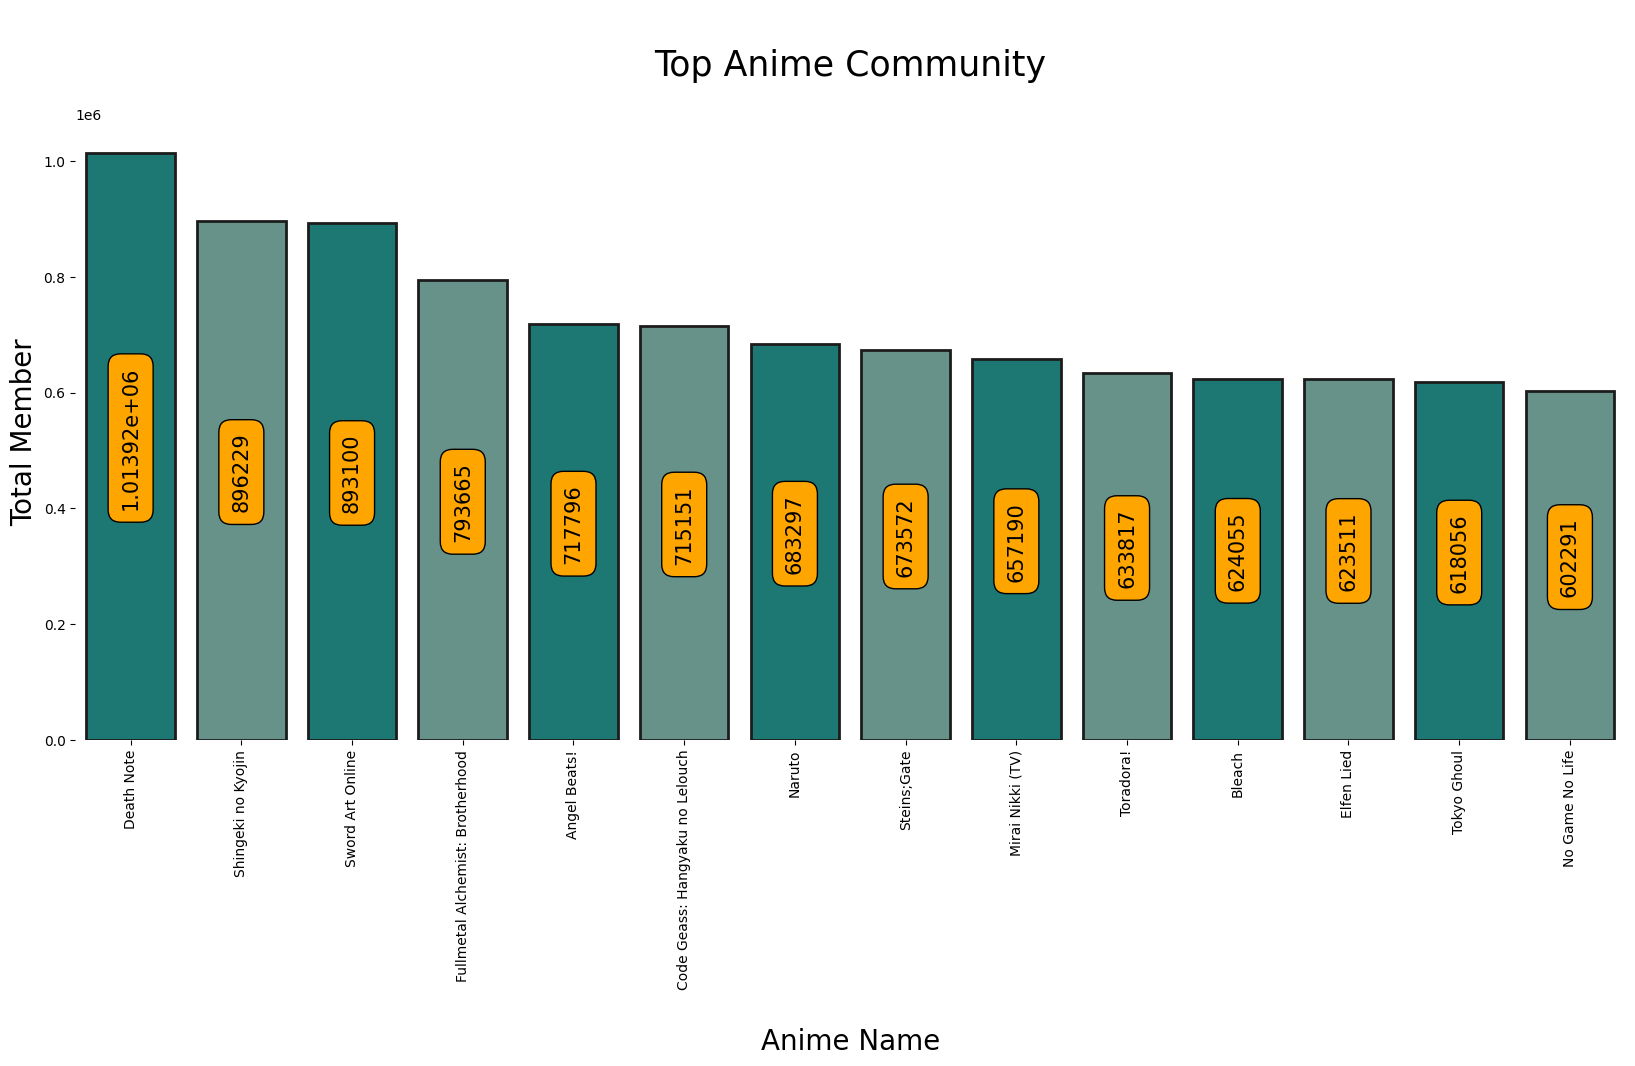

In [25]:
top_anime = fulldata.copy()
top_anime.drop_duplicates(subset ="name", keep = "first", inplace = True)
top_anime_temp1 = top_anime.sort_values(["members"],ascending=False)

palette = ["#1d7874","#679289"]
plt.subplots(figsize=(20,8))
p = sns.barplot(x=top_anime_temp1["name"][:14],y=top_anime_temp1["members"], palette = palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 2)
p.axes.set_title("\nTop Anime Community\n", fontsize=25)
plt.ylabel("Total Member" , fontsize = 20)
plt.xlabel("\nAnime Name" , fontsize = 20)
# plt.yscale("log")
plt.xticks(rotation = 90)
for container in p.containers:
    p.bar_label(container, label_type = "center", padding = 6, size = 15, color = "black", rotation = 90,
    bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "orange", "edgecolor": "black", "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

Death Note memiliki rating tertinggi diikuti oleh Shingeki no Kyojin dan Sword Art Online

## Anime Category

In [26]:
print("Anime Categories :")
top_anime_temp1["type"].value_counts().to_frame()

Anime Categories :


,type
TV,3402
OVA,3090
Movie,2111
Special,1581
ONA,526
Music,451


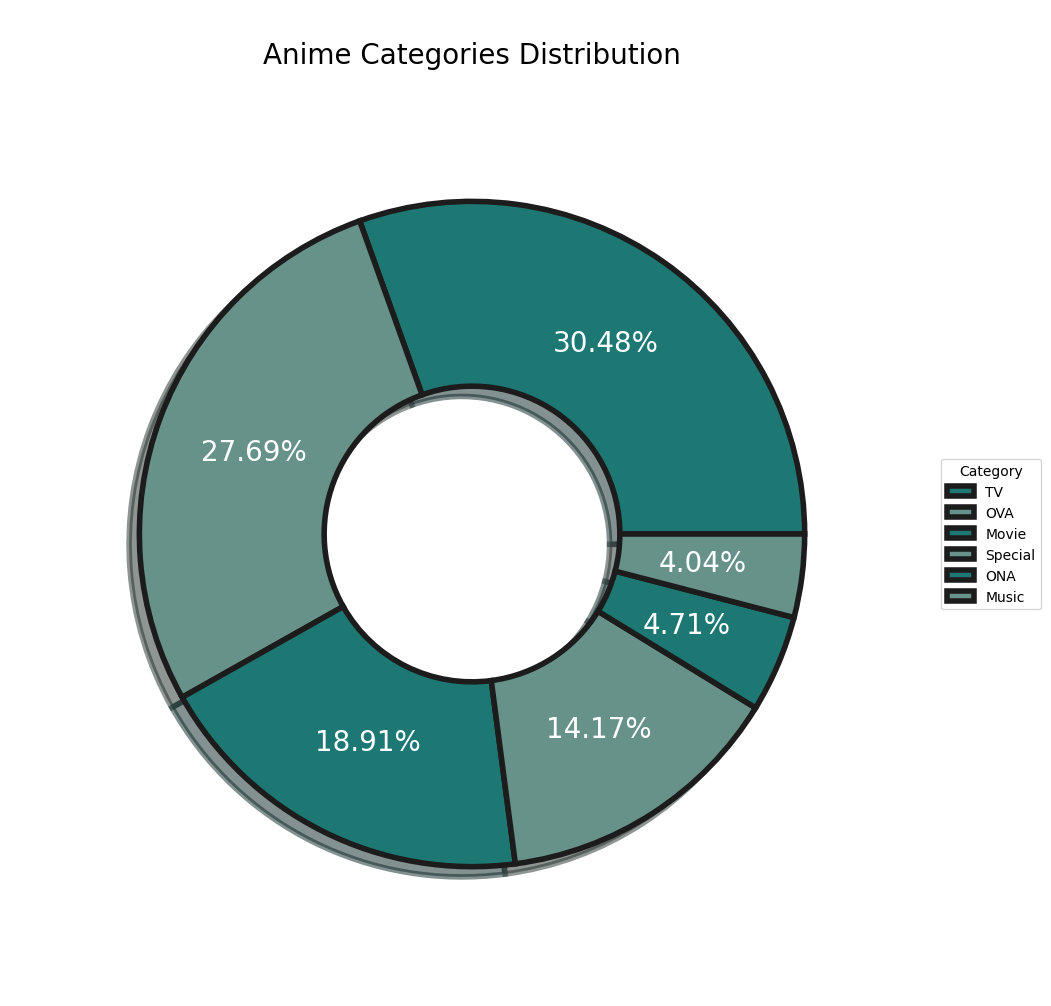

In [27]:
plt.subplots(figsize=(12, 12))

labels = "TV","OVA","Movie","Special","ONA","Music"
size = 0.5

wedges, texts, autotexts = plt.pie([len(top_anime_temp1[top_anime_temp1["type"]=="TV"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="OVA"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="Movie"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="Special"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="ONA"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="Music"]["type"])],
                                    explode = (0,0,0,0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%",
                                    pctdistance = 0.7,
                                    radius=.9,
                                    colors = palette,
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "#1c1c1c",
                                    linewidth = 4),
                                    startangle = 0)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nAnime Categories Distribution",fontsize=20)
plt.show()

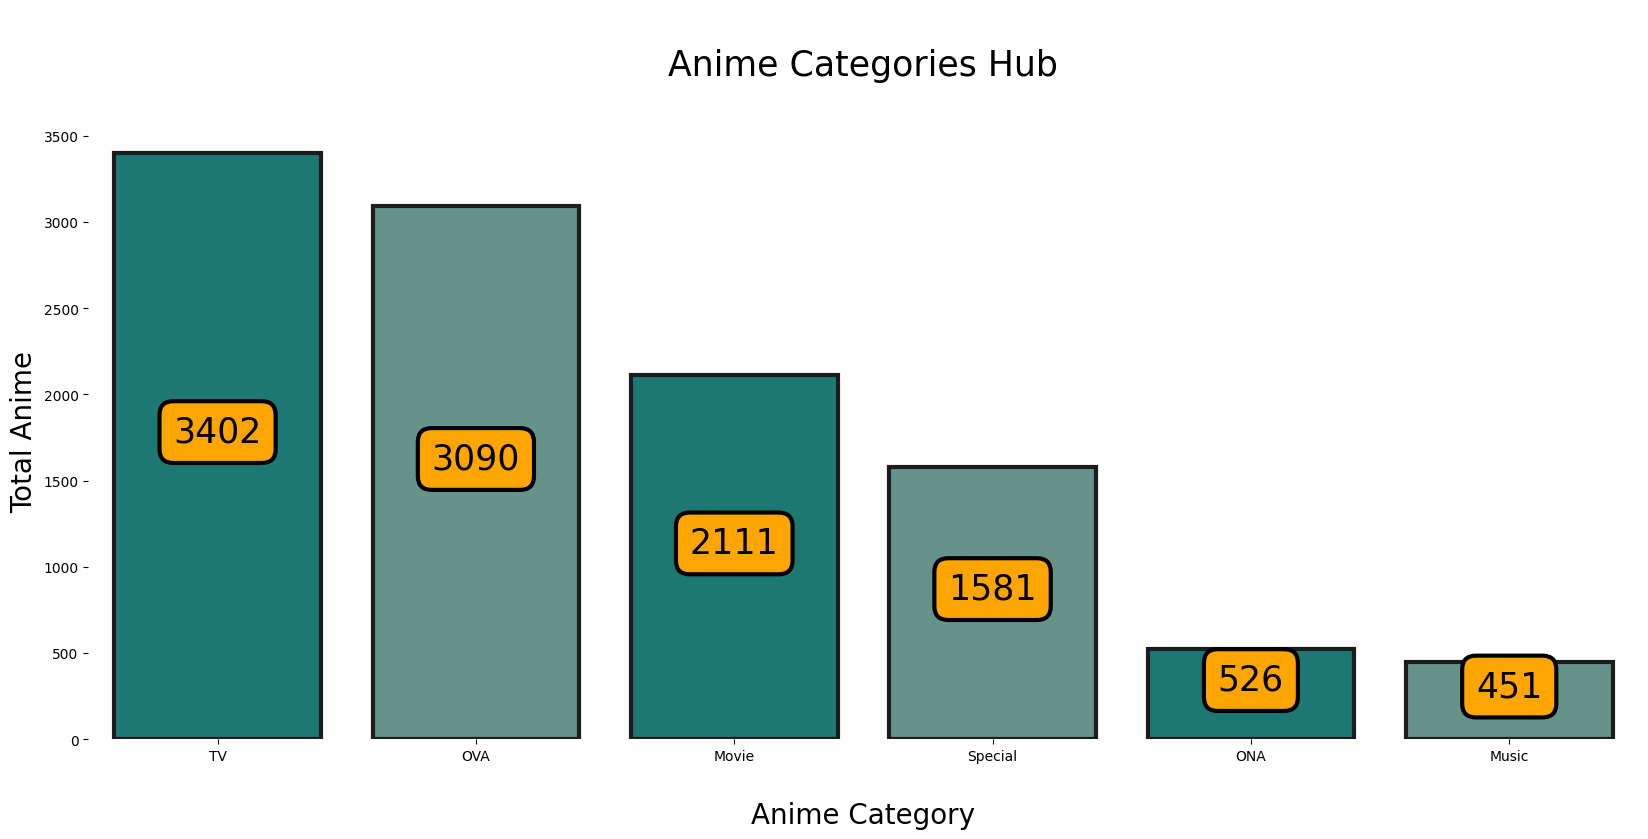

In [28]:
plt.subplots(figsize = (20,8))
p = sns.countplot(x = top_anime_temp1["type"], order = top_anime_temp1["type"].value_counts().index, palette = palette, saturation = 1, edgecolor = "#1c1c1c", linewidth = 3)
p.axes.set_title("\nAnime Categories Hub\n" ,fontsize = 25)
plt.ylabel("Total Anime" ,fontsize = 20)
plt.xlabel("\nAnime Category" ,fontsize = 20)
plt.xticks(rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 10,size = 25,color = "black",rotation = 0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "black", "linewidth" : 3, "alpha": 1})

sns.despine(left = True, bottom = True)
plt.show()

- 3402 anime ditayangkan di TV yang merupakan 30,48% dari total anime
- 2111 anime ditayangkan sebagai Film yaitu 18,91% dari total anime
- 3090 anime disiarkan sebagai OVA yang merupakan 27,69% dari total anime juga lebih besar dari ONA yang mencakup 526 anime yaitu 4,71 % dari total anime.

## Anime Ratings

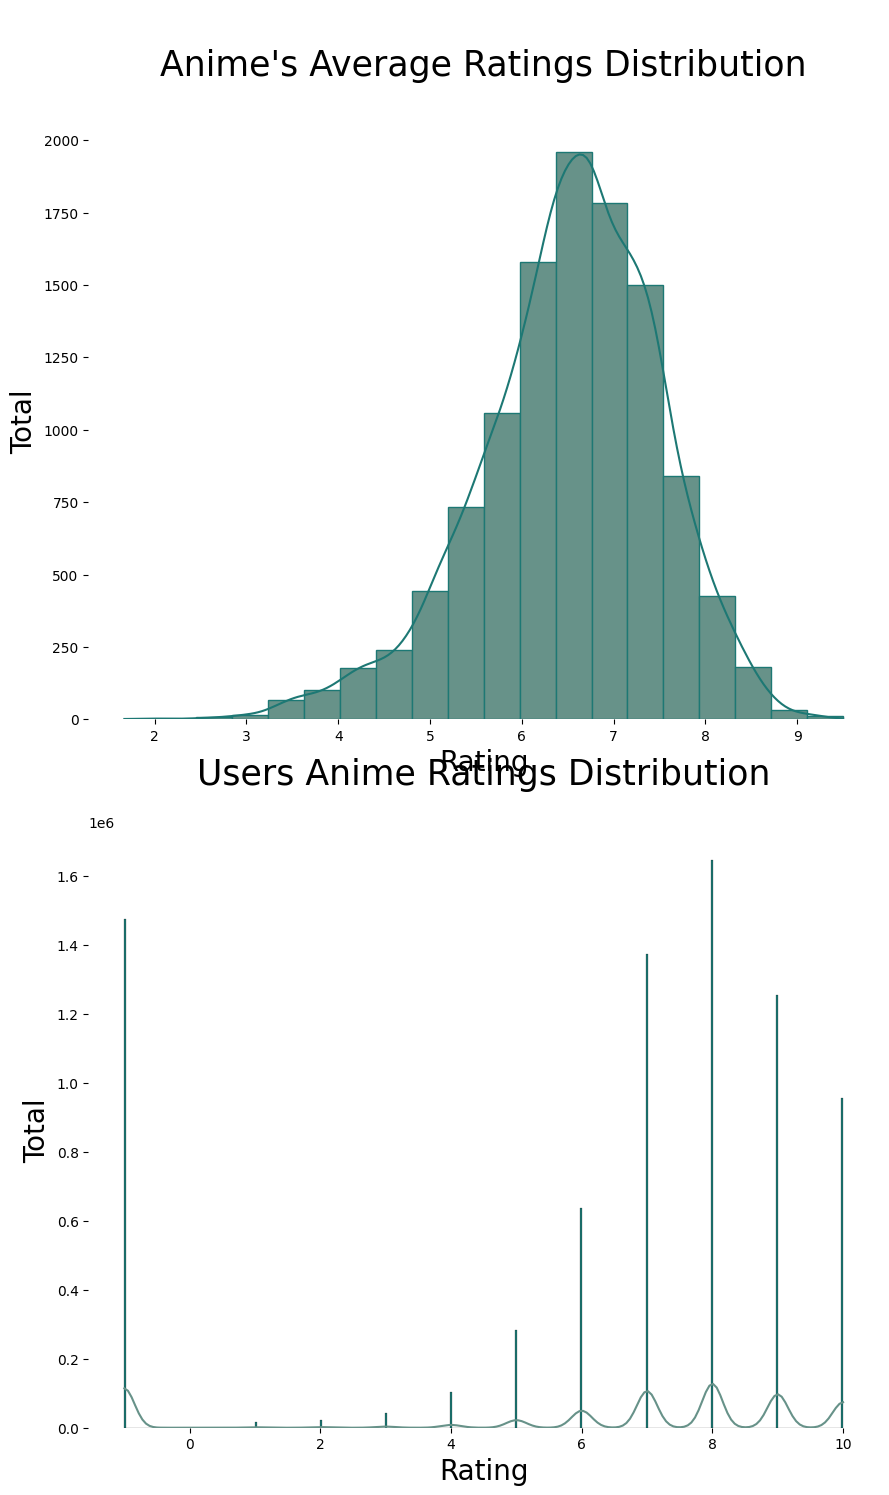

In [41]:
top_anime_temp2 = top_anime.sort_values(["rating"],ascending=False)

_, axs = plt.subplots(2,1,figsize=(10,15),sharex=False,sharey=False)
plt.tight_layout(pad=6.0)

sns.histplot(top_anime_temp2["rating"],color=palette[1],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[0])
axs[0].lines[0].set_color(palette[0])
axs[0].set_title("\nAnime's Average Ratings Distribution\n",fontsize = 25)
axs[0].set_xlabel("Rating\n", fontsize = 20)
axs[0].set_ylabel("Total", fontsize = 20)

sns.histplot(fulldata["user_rating"],color=palette[0],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True)
axs[1].lines[0].set_color(palette[1])
# axs[1].set_yscale("log")
axs[1].set_title("\n\n\nUsers Anime Ratings Distribution\n",fontsize = 25)
axs[1].set_xlabel("Rating", fontsize = 20)
axs[1].set_ylabel("Total", fontsize = 20)

sns.despine(left=True, bottom=True)
plt.show()

- Sebagian besar rating Anime tersebar antara 5,5 - 8,0
- Sebagian besar rating pengguna tersebar antara 6,0 - 10,0
- Modus distribusi rating pengguna adalah sekitar 7,0 - 8,0
- Kedua distribusi tersebut condong ke kiri
-Peringkat pengguna (-1) merupakan outlier dalam peringkat pengguna yang dapat dibuang

## Top Animes Based On Ratings

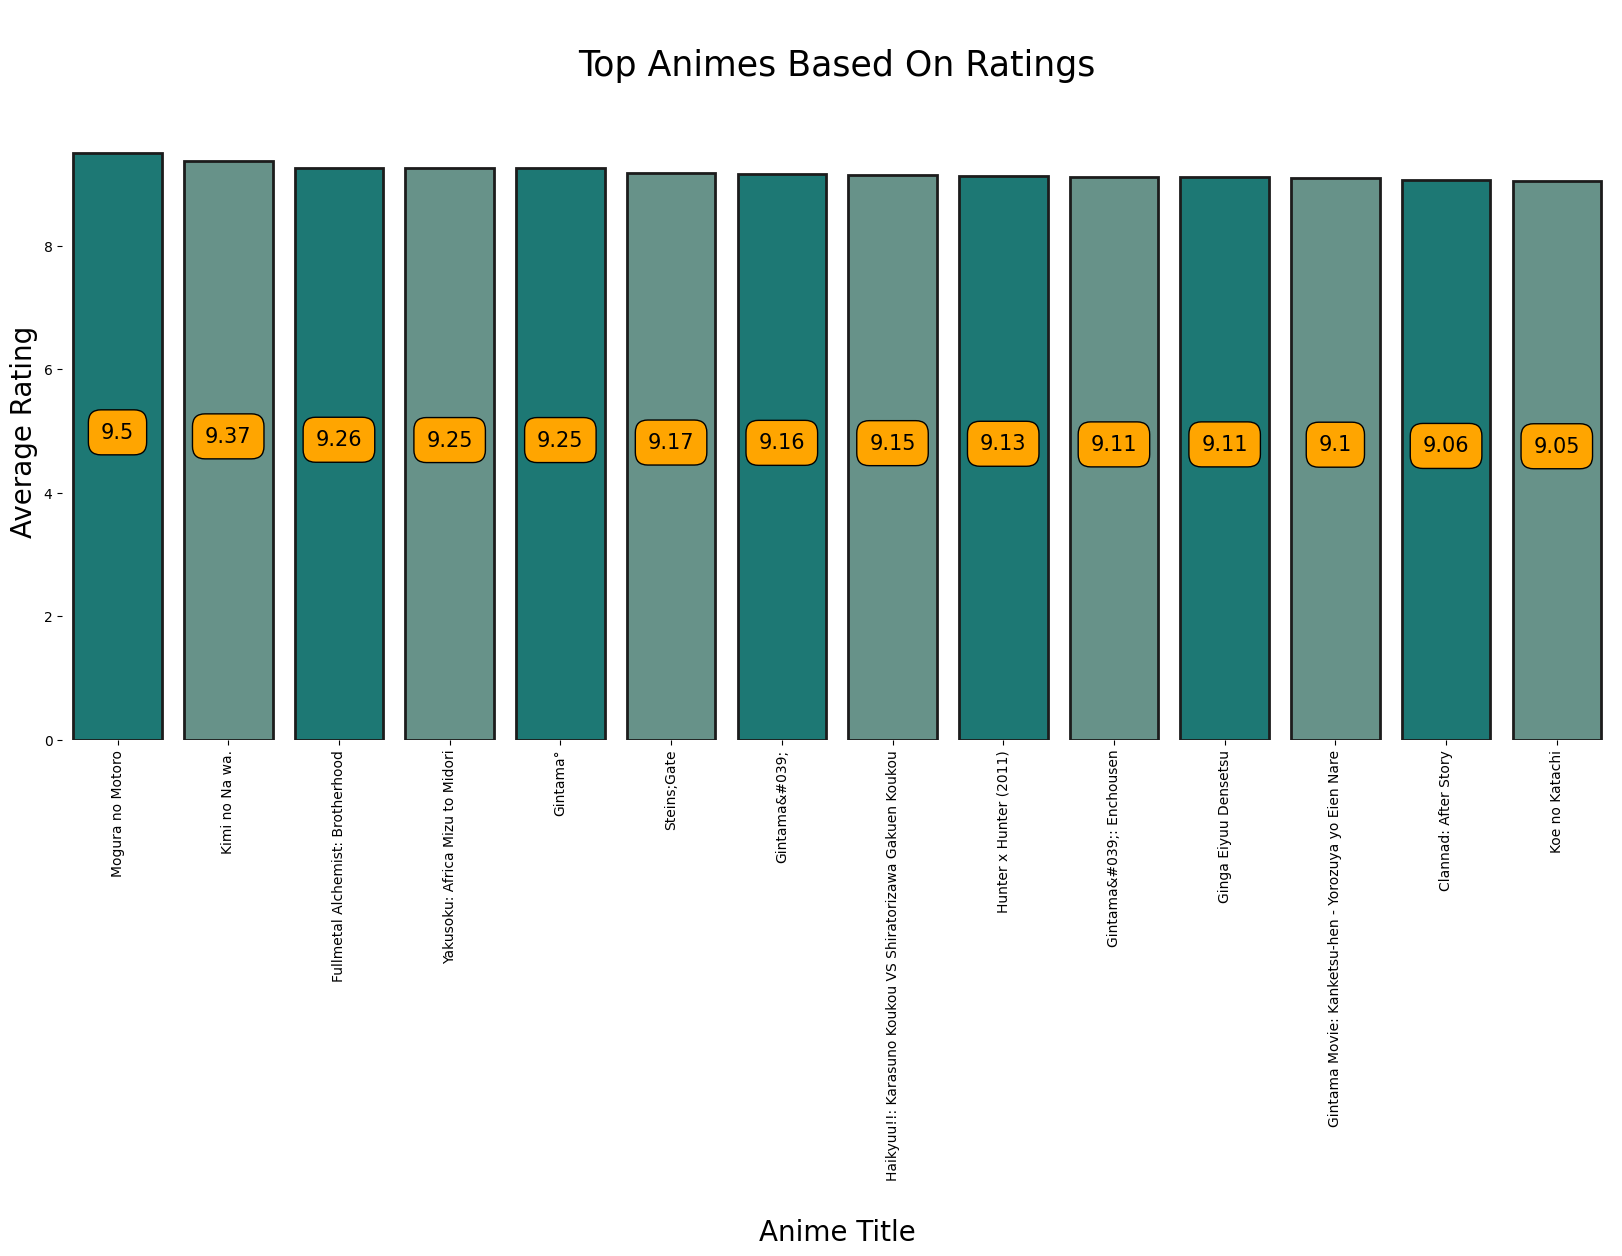

In [43]:
plt.subplots(figsize=(20,8))
p = sns.barplot(x=top_anime_temp2["name"][:14],y=top_anime_temp2["rating"],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 2)
p.axes.set_title("\nTop Animes Based On Ratings\n",fontsize = 25)
plt.ylabel("Average Rating",fontsize = 20)
plt.xlabel("\nAnime Title",fontsize = 20)
# plt.yscale("log")
plt.xticks(rotation = 90)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 10,size = 15,color = "black",rotation = 0,
    bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "orange", "edgecolor": "black", "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

Mogura no Motoro menduduki mahkota untuk rating tertinggi diikuti oleh Kimi no Na wa. dan Fullmetal Alchemist: Brotherhood

## Category-wise Anime Ratings Distribution

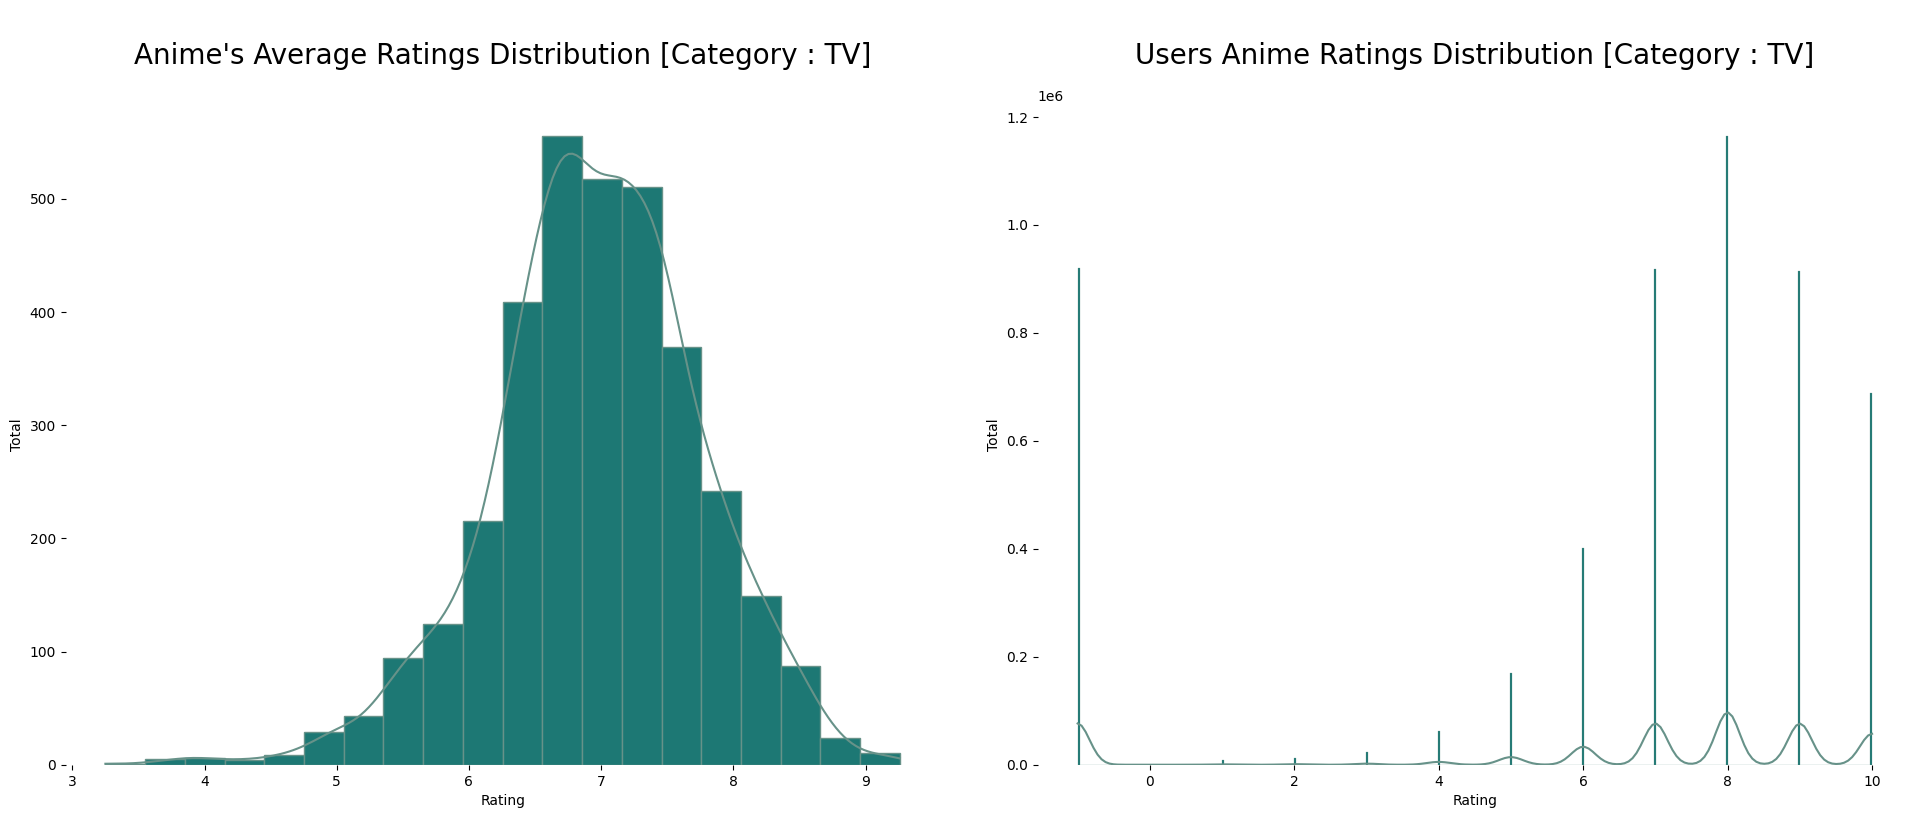

In [46]:
_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(top_anime_temp2[top_anime_temp2["type"]=="TV"]["rating"],color=palette[0],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[1])
axs[0].lines[0].set_color(palette[1])
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : TV]\n",fontsize=20)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(fulldata[fulldata["type"]=="TV"]["user_rating"],color=palette[0],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[1])
axs[1].lines[0].set_color(palette[1])
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : TV]\n", fontsize=20)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()

- Sebagian besar rating Anime tersebar antara 6,0 - 8,0
- Sebagian besar rating pengguna tersebar antara 6,0 - 10,0
- Modus distribusi rating pengguna adalah sekitar 7,0 - 9,0
- Kedua distribusi tersebut condong ke kiri
- Rating pengguna (-1) merupakan outlier dalam peringkat pengguna yang dapat dibuang

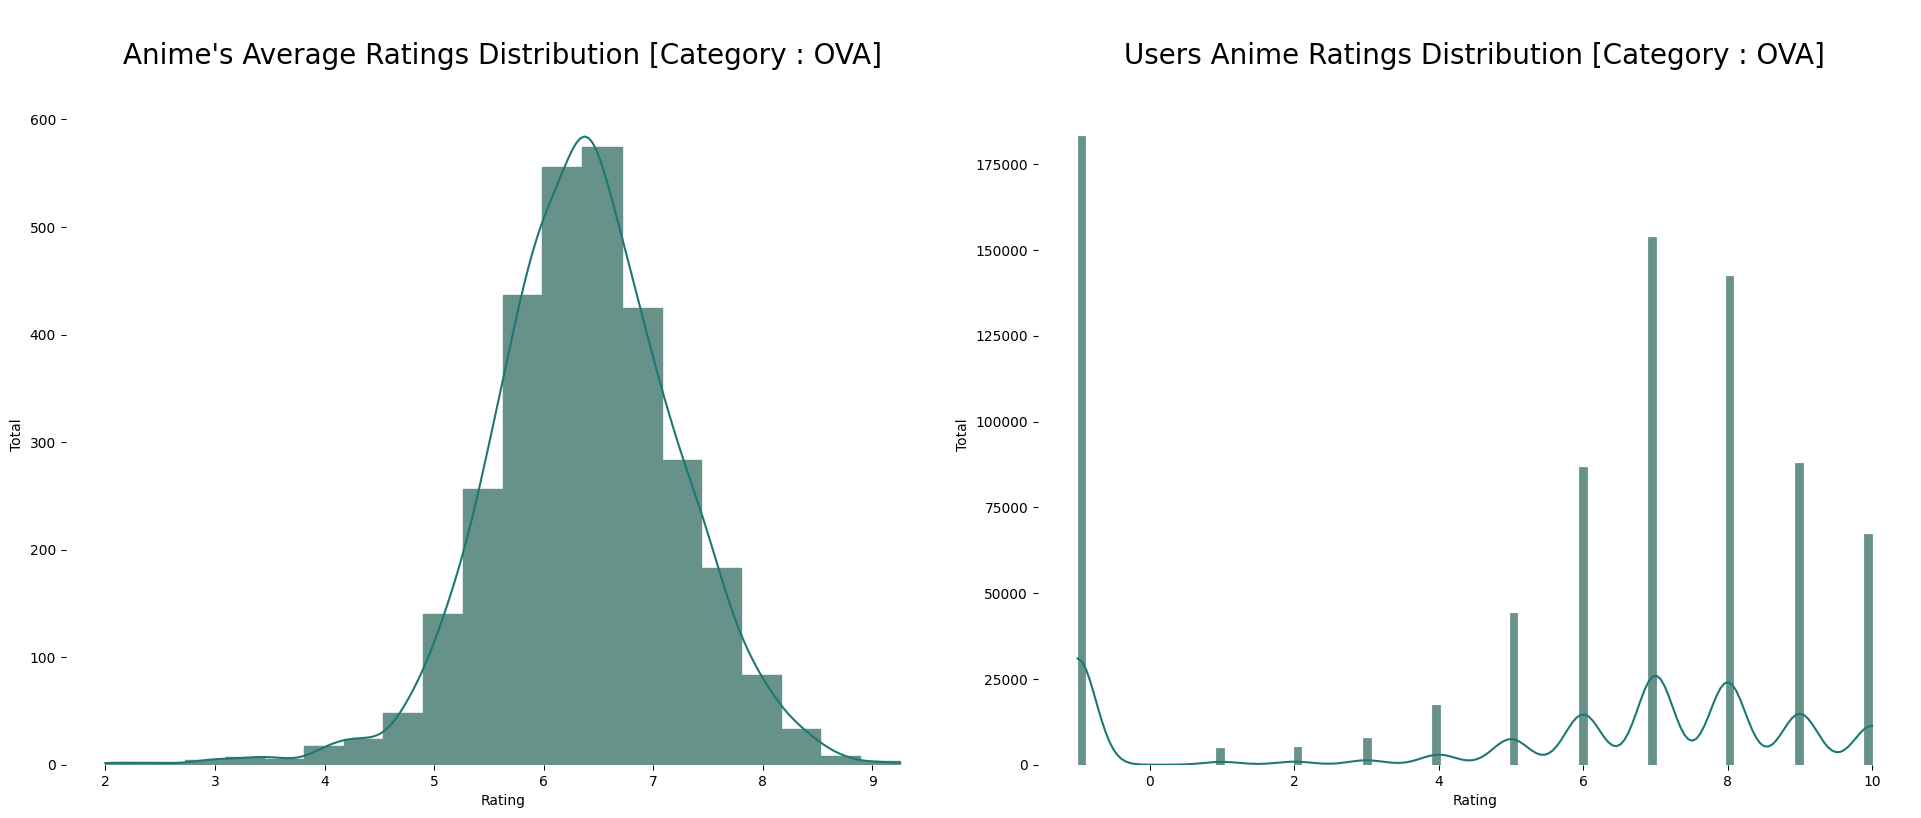

In [48]:
_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(top_anime_temp2[top_anime_temp2["type"]=="OVA"]["rating"],color=palette[1],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[1])
axs[0].lines[0].set_color(palette[0])
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : OVA]\n",fontsize=20)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(fulldata[fulldata["type"]=="OVA"]["user_rating"],color=palette[1],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[1])
axs[1].lines[0].set_color(palette[0])
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : OVA]\n",fontsize=20)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()

- Sebagian besar rating Anime tersebar antara 5,5 - 7,5
- Sebagian besar rating pengguna tersebar antara 5,5 - 10,0
- Modus distribusi rating pengguna adalah sekitar 7,0 - 8,0
- Kedua distribusi tersebut miring ke kiri
- Peringkat pengguna (-1) adalah outlier dalam peringkat pengguna yang dapat dibuang

Let's explore the ratings distribution of MOVIE category :



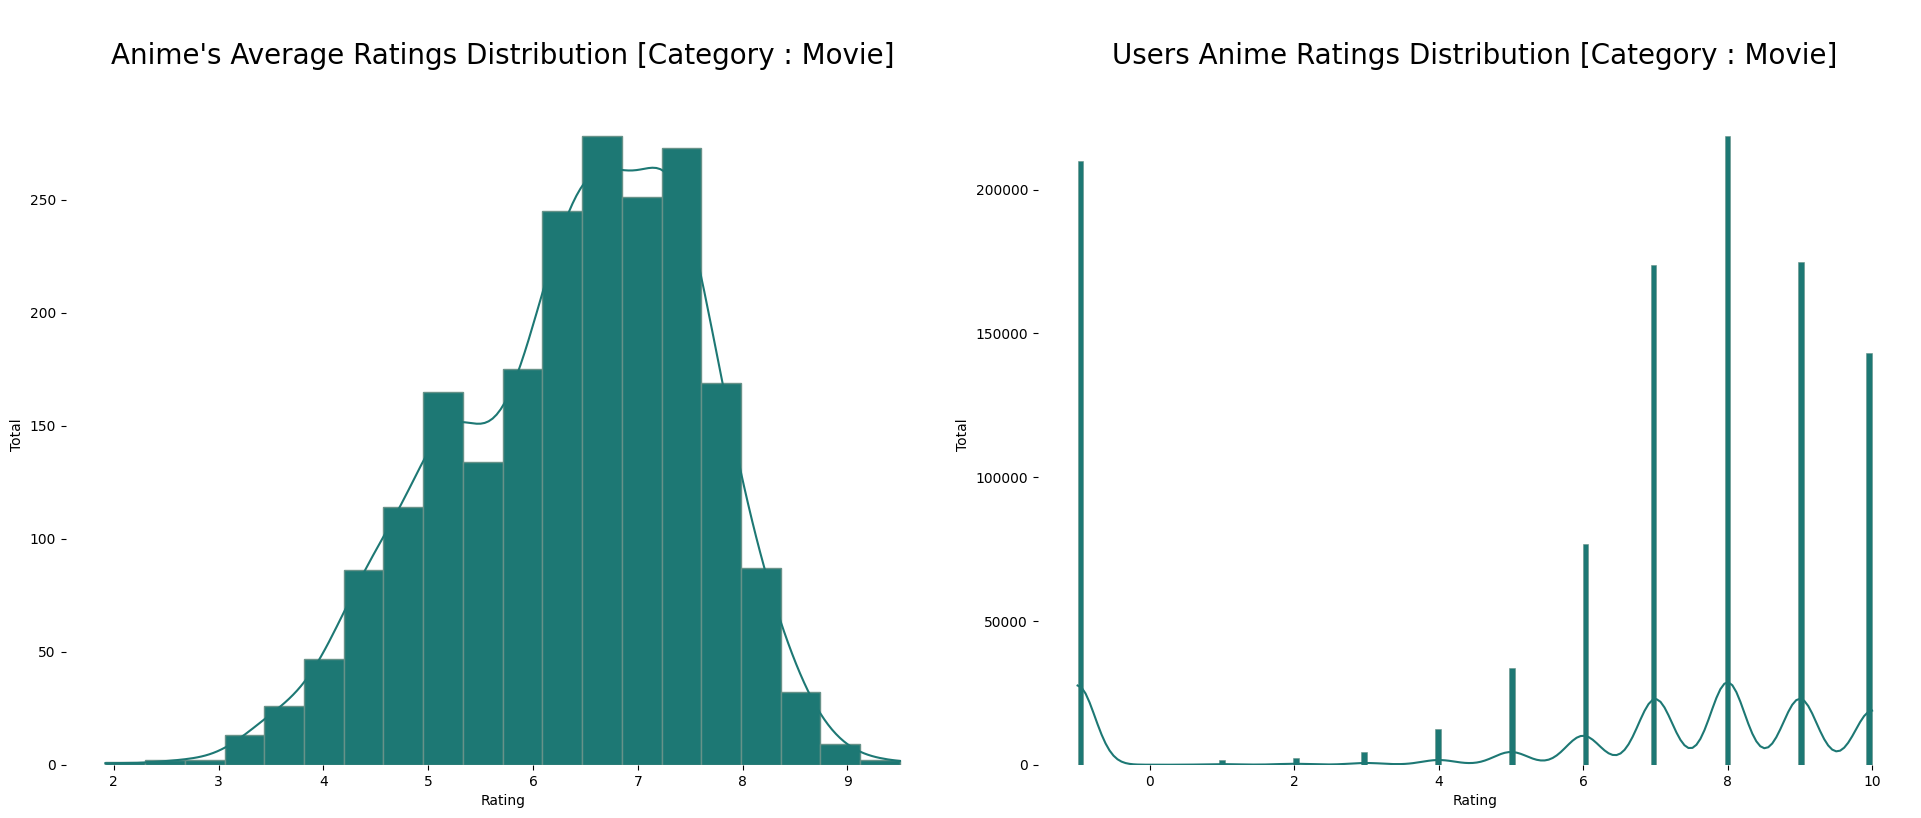

In [52]:
print("Let's explore the ratings distribution of MOVIE category :\n")

_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(top_anime_temp2[top_anime_temp2["type"]=="Movie"]["rating"],color=palette[0],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[1])
axs[0].lines[0].set_color(palette[0])
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : Movie]\n",fontsize=20)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(fulldata[fulldata["type"]=="Movie"]["user_rating"],color=palette[0],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[1])
axs[1].lines[0].set_color(palette[0])
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : Movie]\n",fontsize=20)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()

- Sebagian besar rating Anime berkisar antara 4,5 - 8,5
- Sebagian besar rating pengguna berkisar antara 5,0 - 10,0
- Modus distribusi rating pengguna adalah sekitar 7,0 - 9,0
- Kedua distribusi tersebut miring ke kiri
- Peringkat pengguna (-1) adalah outlier dalam peringkat pengguna yang dapat dibuang

Let's explore the ratings distribution of SPECIAL category :



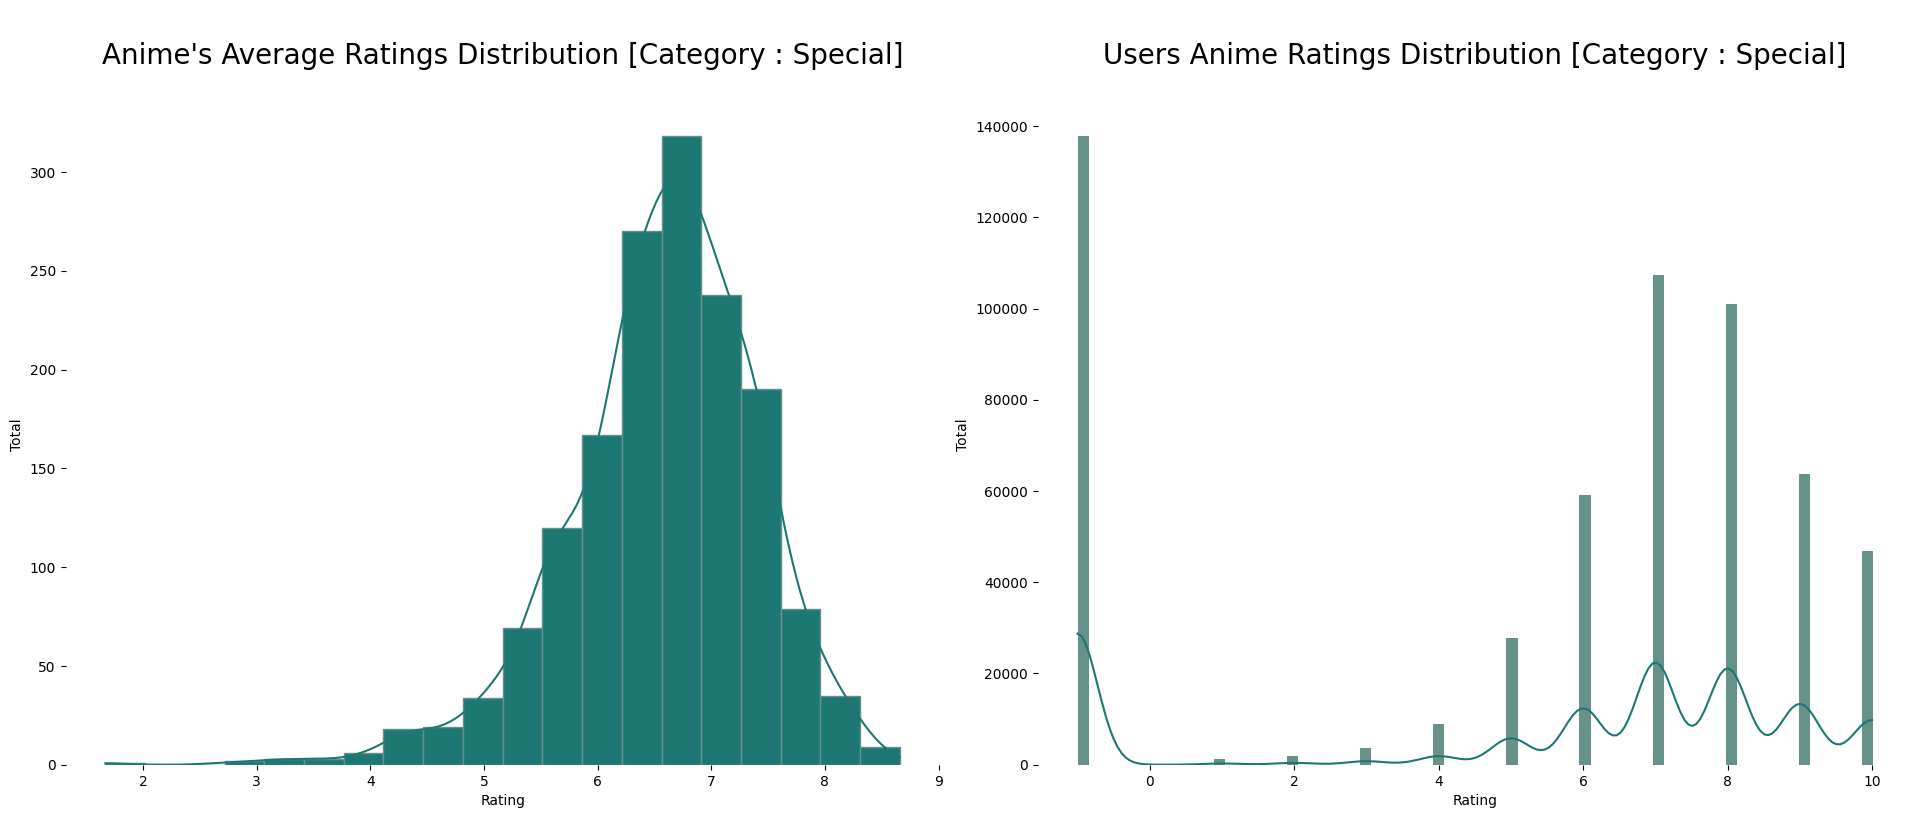

In [58]:
print("Let's explore the ratings distribution of SPECIAL category :\n")

_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(top_anime_temp2[top_anime_temp2["type"]=="Special"]["rating"],color=palette[0],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[1])
axs[0].lines[0].set_color(palette[0])
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : Special]\n",fontsize=20)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(fulldata[fulldata["type"]=="Special"]["user_rating"],color=palette[1],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[1])
axs[1].lines[0].set_color(palette[0])
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : Special]\n",fontsize=20)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()

- Sebagian besar rating Anime tersebar antara 5,5 - 8,0
- Sebagian besar rating pengguna tersebar antara 5,0 - 10,0
- Modus distribusi rating pengguna adalah sekitar 7,0 - 8,0
- Kedua distribusi tersebut condong ke kiri
- Peringkat pengguna (-1) adalah outlier dalam peringkat pengguna yang dapat dibuang

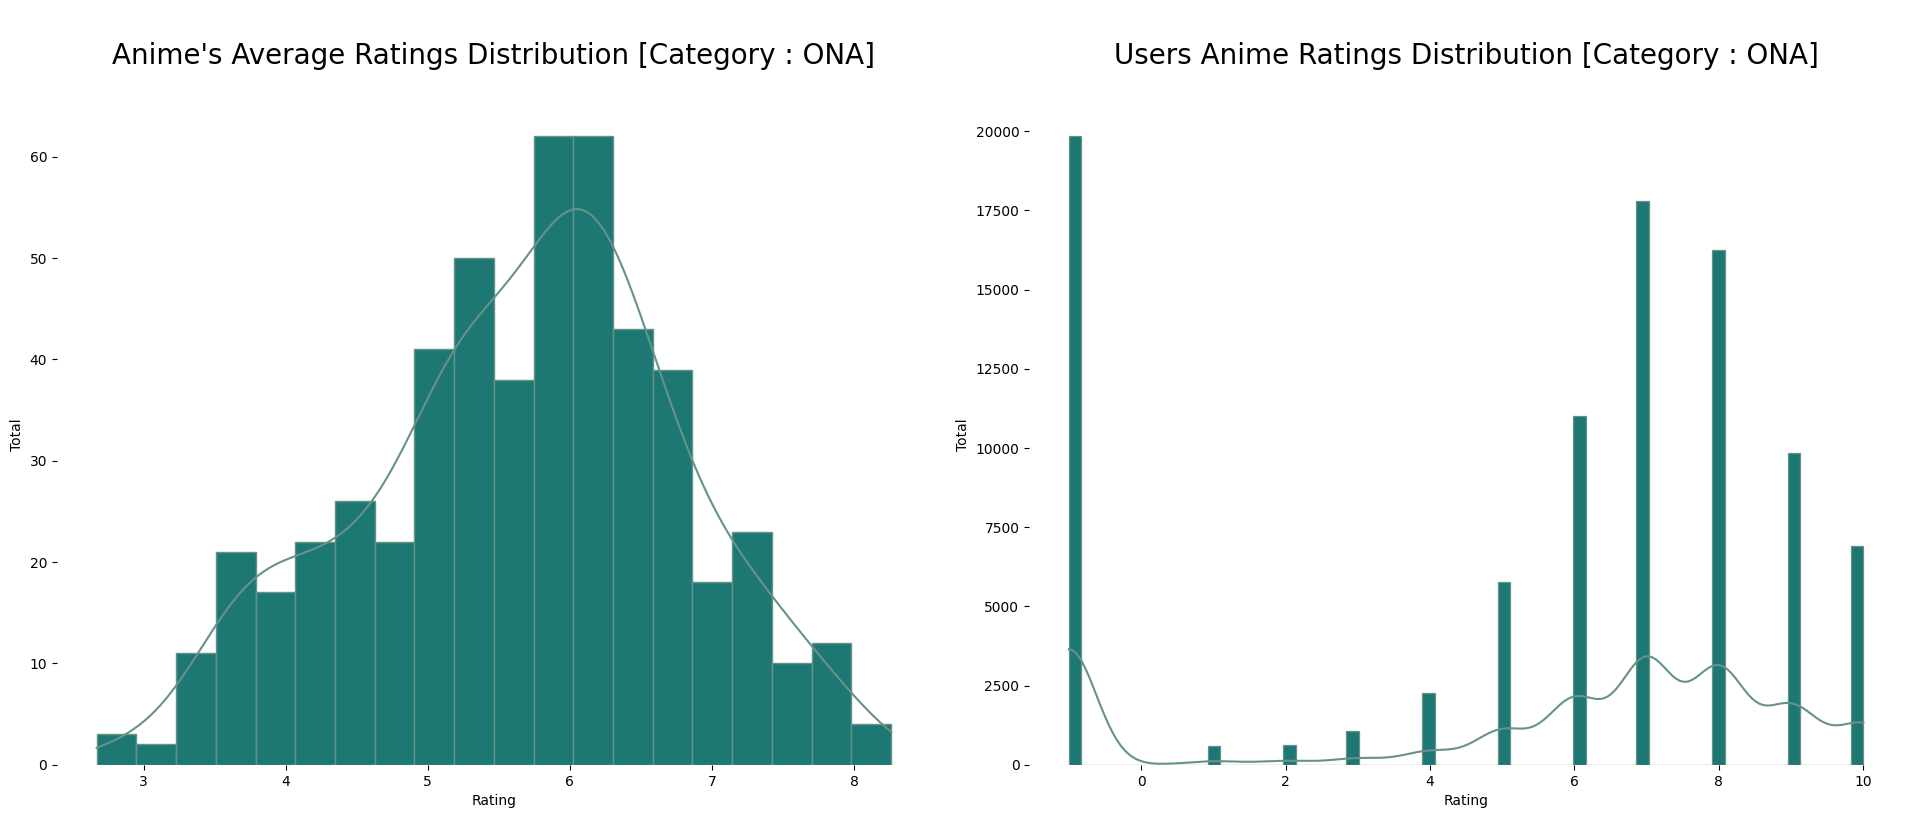

In [59]:
_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(top_anime_temp2[top_anime_temp2["type"]=="ONA"]["rating"],color=palette[0],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[1])
axs[0].lines[0].set_color(palette[1])
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : ONA]\n",fontsize=20)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(fulldata[fulldata["type"]=="ONA"]["user_rating"],color=palette[0],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[1])
axs[1].lines[0].set_color(palette[1])
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : ONA]\n",fontsize=20)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()

- Sebagian besar rating Anime tersebar antara 4,0 - 7,0
- Sebagian besar rating pengguna tersebar antara 5,0 - 10,0
- Modus distribusi rating pengguna adalah sekitar 7,0 - 8,0
- Kedua distribusi tersebut condong ke kiri
- Peringkat pengguna (-1) adalah outlier dalam peringkat pengguna yang dapat dibuang

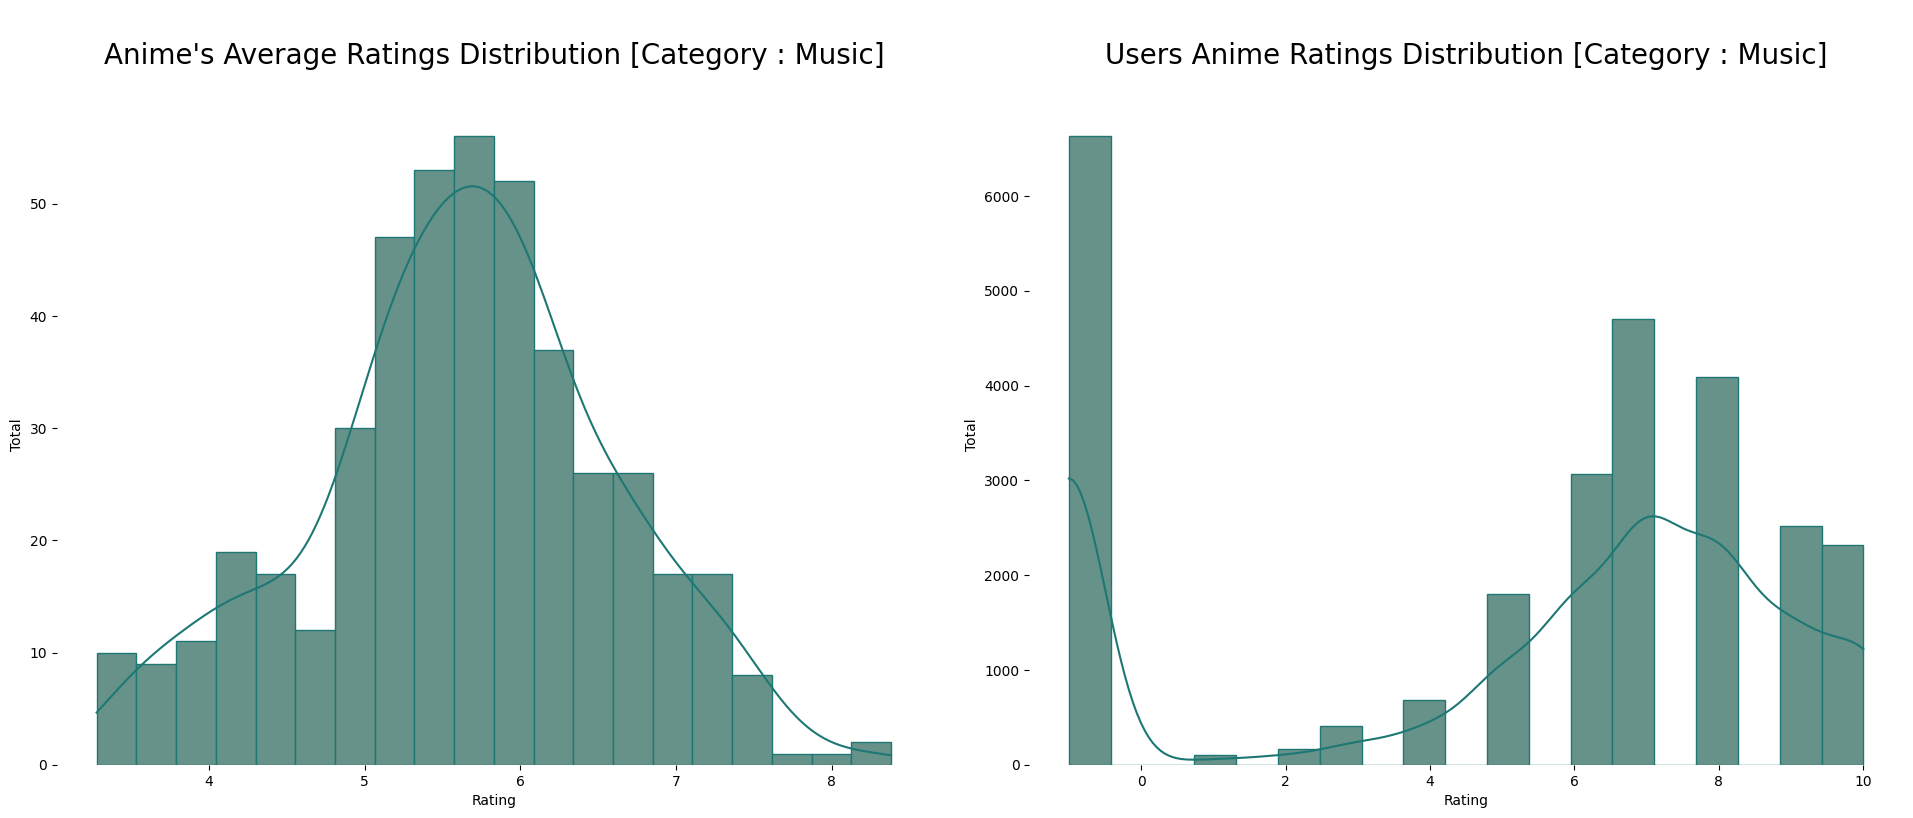

In [60]:
_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(top_anime_temp2[top_anime_temp2["type"]=="Music"]["rating"],color=palette[1],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[0])
axs[0].lines[0].set_color(palette[0])
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : Music]\n",fontsize=20)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(fulldata[fulldata["type"]=="Music"]["user_rating"],color=palette[1],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[0])
axs[1].lines[0].set_color(palette[0])
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : Music]\n",fontsize=20)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()

- Sebagian besar rating Anime tersebar antara 4,0 - 7,5
- Sebagian besar rating pengguna tersebar antara 5,0 - 10,0
- Modus distribusi rating pengguna adalah sekitar 6,5 - 8,0
- Kedua distribusi tersebut miring ke kiri
- Peringkat pengguna (-1) adalah outlier dalam peringkat pengguna yang dapat dibuang

# Final Data Preprocessing

In [64]:
data = fulldata.copy()
data["user_rating"].replace(to_replace = -1 , value = np.nan ,inplace=True)
data = data.dropna(axis = 0)
print("Null values after final pre-processing :")
data.isna().sum().to_frame().T

Null values after final pre-processing :


,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,0,0,0,0,0,0,0,0,0


----
Ada banyak pengguna yang hanya memberikan rating satu kali, meskipun mereka telah memberi rating 5 anime, hal tersebut tidak dapat dianggap sebagai catatan berharga untuk rekomendasi.

----
Jadi, akan mempertimbangkan minimum 50 peringkat oleh pengguna sebagai nilai ambang batas. Dengan membuat tabel pivot yang terdiri dari baris sebagai judul dan kolom sebagai user id, ini akan membantu  membuat matriks renggang yang bisa sangat membantu dalam mencari kesamaan cosinus.

In [66]:
selected_users = data["user_id"].value_counts()
data = data[data["user_id"].isin(selected_users[selected_users >= 50].index)]

In [67]:
data_pivot_temp = data.pivot_table(index="name",columns="user_id",values="user_rating").fillna(0)
data_pivot_temp.head()

user_id,3,5,7,11,14,17,21,23,24,27,...,73495,73499,73500,73501,73502,73503,73504,73507,73510,73515
name,,,,,,,,,,,,,,,,,,,,,
&quot;0&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Memoire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
&quot;Bungaku Shoujo&quot; Movie,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
&quot;Eiji&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
import re
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)

    return text

data["name"] = data["name"].apply(text_cleaning)

In [69]:
data_pivot = data.pivot_table(index="name",columns="user_id",values="user_rating").fillna(0)
print("After Cleaning the animes names, let's see how it looks like.")
data_pivot.head()

After Cleaning the animes names, let's see how it looks like.


user_id,3,5,7,11,14,17,21,23,24,27,...,73495,73499,73500,73501,73502,73503,73504,73507,73510,73515
name,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009 Re:Cyborg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009-1: RandB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Collaborative Recommender

Pemfilteran kolaboratif adalah teknik yang dapat menyaring item yang mungkin disukai pengguna berdasarkan reaksi dari pengguna serupa. Ia bekerja dengan mencari sekelompok besar orang dan menemukan sekelompok kecil pengguna dengan selera yang mirip dengan pengguna tertentu. Dalam proyek akan menggunakan kesamaan Cosine yang merupakan metrik yang digunakan untuk mengukur seberapa mirip suatu dokumen terlepas dari ukurannya. Secara matematis, ini mengukur kosinus sudut antara dua vektor yang diproyeksikan dalam ruang multidimensi. Kesamaan kosinus menguntungkan karena meskipun dua dokumen serupa berjauhan berdasarkan jarak Euclidean (karena ukuran dokumen), kemungkinan keduanya masih diorientasikan lebih berdekatan. Semakin kecil sudutnya, semakin tinggi kesamaan kosinusnya

In [72]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

data_matrix = csr_matrix(data_pivot.values)

model_knn = NearestNeighbors(metric = "cosine", algorithm = "brute")
model_knn.fit(data_matrix)

query_no = np.random.choice(data_pivot.shape[0])
print(f"We will find recommendation for {query_no} no anime which is {data_pivot.index[query_no]}.")
distances, indices = model_knn.kneighbors(data_pivot.iloc[query_no,:].values.reshape(1, -1), n_neighbors = 6)

We will find recommendation for 5111 no anime which is Madonna.


In [73]:
no = []
name = []
distance = []
rating = []

for i in range(0, len(distances.flatten())):
    if i == 0:
        print(f"Recommendations for {data_pivot.index[query_no]} viewers :\n")
    else:
        #  print(f"{i}: {data_pivot.index[indices.flatten()[i]]} , with distance of {distances.flatten()[i]}")
        no.append(i)
        name.append(data_pivot.index[indices.flatten()[i]])
        distance.append(distances.flatten()[i])
        rating.append(*anime[anime["name"]==data_pivot.index[indices.flatten()[i]]]["rating"].values)

dic = {"No" : no, "Anime Name" : name, "Rating" : rating}
recommendation = pd.DataFrame(data = dic)
recommendation.set_index("No", inplace = True)
recommendation.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Recommendations for Madonna viewers :



,Anime Name,Rating
No,,
1,Mujigen Hunter Fandora,5.950000
2,Touyama Sakura Uchuu Chou: Yatsu no Na wa Gold,5.890000
3,Jigokudou Reikai Tsuushin,6.490000
4,Scoopers,6.080000
5,Karuizawa Syndrome,6.270000


# Content Based Recommender

Pemfilteran berbasis konten merekomendasikan item berdasarkan perbandingan antara konten item dan profil pengguna. Isi setiap item direpresentasikan sebagai sekumpulan deskriptor atau istilah, biasanya kata-kata yang muncul dalam dokumen. Pemberi rekomendasi berbasis konten bekerja dengan data yang disediakan pengguna, baik secara eksplisit (memberi peringkat) atau secara implisit (mengklik tautan). Berdasarkan data tersebut, profil pengguna dibuat yang kemudian digunakan untuk memberikan saran kepada pengguna. Saat pengguna memberikan lebih banyak masukan atau mengambil tindakan berdasarkan rekomendasi, mesin menjadi semakin akurat.

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=3, max_features=None, strip_accents="unicode", analyzer="word",
                      token_pattern=r"\w{1,}", ngram_range=(1, 3), stop_words = "english")

rec_data = fulldata.copy()
rec_data.drop_duplicates(subset ="name", keep = "first", inplace = True)
rec_data.reset_index(drop = True, inplace = True)
genres = rec_data["genre"].str.split(", | , | ,").astype(str)
tfv_matrix = tfv.fit_transform(genres)

Di sini kita perlu menetapkan 1 untuk anime yang direkomendasikan dan 0 untuk anime yang tidak direkomendasikan yang akan menggunakan kernel sigmoid

In [76]:
from sklearn.metrics.pairwise import sigmoid_kernel

sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

rec_indices = pd.Series(rec_data.index, index = rec_data["name"]).drop_duplicates()

def give_recommendation(title, sig = sig):

    idx = rec_indices[title]

    sig_score = list(enumerate(sig[idx]))
    sig_score = sorted(sig_score, key=lambda x: x[1], reverse=True)
    sig_score = sig_score[1:11]
    anime_indices = [i[0] for i in sig_score]

    # Top 10 most similar movies
    rec_dic = {"No" : range(1,11),
               "Anime Name" : anime["name"].iloc[anime_indices].values,
               "Rating" : anime["rating"].iloc[anime_indices].values}
    dataframe = pd.DataFrame(data = rec_dic)
    dataframe.set_index("No", inplace = True)

    print(f"Recommendations for {title} viewers :\n")

    return dataframe.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

In [81]:
give_recommendation("Love Stage!!")

Recommendations for Love Stage!! viewers :



,Anime Name,Rating
No,,
1,Shingeki no Kyojin Movie 2: Jiyuu no Tsubasa,7.750000
2,Ranma ½: Akumu! Shunmin Kou,7.700000
3,Fushigi no Umi no Nadia,7.650000
4,Final Fantasy: Unlimited,6.290000
5,Nogizaka Haruka no Himitsu: Purezza,7.290000
6,Ultraviolet: Code 044,6.090000
7,Boku no Hero Academia,8.360000
8,Nanaka 6/17,6.750000
9,Ugokie Kori no Tatehiki,5.720000


# Summary


> Sistem Rekomendasi dengan menggunakan collaborative recommender dan content based recommender berhasil dibuat

